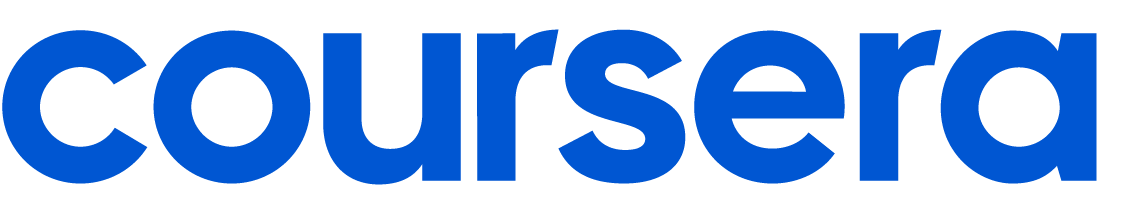

# Welcome to Challenge Labs!

Challenge labs provide CS & DS Coding Competitions with Prizes that Change Learners’ Lives!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly life changing like job interviews at real companies.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the retention prediction problem on a very unique and interesting group of subscribers, Coursera learners! On Coursera, learners can subscribe to sets of courses in order to gain full access to graded assignments, hands-on projects, and course completion certificates. One of the most common ways that learners subscribe to content is via [Specialization Subscriptions](https://www.coursera.support/s/article/216348103-Coursera-subscriptions?language=en_US#specialization), which give learners unlimited access to the courses in a specific specialization on a month-to-month basis.

Imagine that you are a new data scientist at Coursera and you are tasked with building a model that can predict which existing specialization subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the learner completes the specialization or reaches their learning goal and no longer needs the subscription
* the learner finds themselves to be too busy and cancels their subscription until a later time
* the learner determines that the specialization is not the best fit for their learning goals, so they cancel and look for something better suited

Regardless the reason, Coursera has a vested interest in understanding the likelihood of each individual learner to retain in their subscription so that resources can be allocated appropriately to support learners across the various stages of their learning journeys. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past specialization subscriptions that contain information about the learner, the specialization, and the learner's activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (509,837 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (217,921 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique specialization subscription. For each subscription, a single observation (`subscription_id`) is included as of a particular date (`observation_dt`) during which the subscription was active. This date was chosen at random from all the dates during which the subscription was active. In some instances it is soon after the subscription was initiated; in other instances, it is several months after the subscription was initiated and after several previous payments were made. Therefore, your model will have to be able to adapt to different stages of the subscription.

In addition to those identifier columns, the `train.csv` dataset also contains the target label for the task, a binary column `is_retained`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [2]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observed to calculate the features in the dataset. It was chosen at random amongst all the dates between the start of the subscription and the end of the subscription (before cancellation)
2,is_retained,Target,Integer,"TRAINING SET ONLY! 0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription"
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,"primary domain of the specialization (Computer Science, Data Science, etc.)"
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""professional certicate"" (a special type of specialization that awards completers with an industry-sponsored credential)"
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""gateway certificate"" (a special type of specialization geared towards learners starting in a new field)"
8,learner_days_since_registration,Feature - Learner Info,integer,Days from coursera registration date to the date on which the observation is made
9,learner_country_group,Feature - Learner Info,character,"the region of the world that the learner is from (United States, East Asia, etc.)"


## How to Submit your Predictions to Coursera

Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 217,921 rows (plus a header row). The first column should be `subscription_id` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription is retained__.

Your submission will show an error if you have extra columns (beyond `subscription_id` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import any other packages you may want to use
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout ,BatchNormalization ,Activation
from tensorflow.keras.callbacks import  ReduceLROnPlateau

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
train_df.shape

(413955, 37)

In [6]:
test_df = pd.read_csv("test.csv")
test_df.shape

(217921, 36)

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [7]:
train_df.head(5)

,subscription_id,observation_dt,is_retained,specialization_id,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,--rKikbGEeyQHQqIvaM5IQ,2022-05-04,1.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,2321.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,73.783333,0.000000,68.0,0.0,20.0
1,-0XGzEq2EeyimBISGRuNeQ,2021-11-30,0.0,Q0Fc_Yl0EeqdTApgQ4tM7Q,6.0,Data Science,True,False,612.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,0.850000,0.000000,7.0,2.0,0.0
2,-1P9kOb6EeuRugq1Liq62w,2021-08-13,0.0,9kmimrDIEeqxzQqieMm42w,6.0,Business,True,True,27.0,Australia and New Zealand,...,0.0,1.0,12.0,2.0,False,1.833333,2.983333,2.0,1.0,18.0
3,-2ifTJZbEeuIuRKpAhovaw,2021-08-03,1.0,7lHCSlFIEeeffRIHljDI_g,5.0,Information Technology,True,True,120.0,United States,...,0.0,2.0,83.0,9.0,False,18.450000,7.100000,18.0,4.0,3.0
4,-5YKZbchEeufeAq6C_fAOw,2021-06-04,0.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,1228.0,India,...,1.0,1.0,61.0,4.0,False,29.566667,15.250000,18.0,8.0,1.0


### Convert column observation_dt data_type to datetime data_type
### Convert some columns(True & False (Boolean)) data_type to int data_type
### Drop columns subscription_id & specialization_id as they didn't have benefit 

In [8]:
train_df['is_active_capstone_during_pay_period']=train_df['is_active_capstone_during_pay_period'].astype("bool")
train_df['is_gateway_certificate']=train_df['is_gateway_certificate'].astype("bool")
train_df['is_professional_certificate']=train_df['is_professional_certificate'].astype("bool")
train_df['is_active_capstone_during_pay_period']=train_df['is_active_capstone_during_pay_period'].astype("bool")
train_df['is_subscription_started_with_free_trial']=train_df['is_subscription_started_with_free_trial'].astype("bool")

train_df['is_active_capstone_during_pay_period']=train_df['is_active_capstone_during_pay_period'].astype("int64")
train_df['is_gateway_certificate']=train_df['is_gateway_certificate'].astype("int64")
train_df['is_professional_certificate']=train_df['is_professional_certificate'].astype("int64")
train_df['is_active_capstone_during_pay_period']=train_df['is_active_capstone_during_pay_period'].astype("int64")
train_df['is_subscription_started_with_free_trial']=train_df['is_subscription_started_with_free_trial'].astype("int64")


train_df.drop(["subscription_id","specialization_id"],axis=1,inplace=True)
train_df['observation_dt']=pd.to_datetime(train_df['observation_dt'])


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413955 entries, 0 to 413954
Data columns (total 35 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   observation_dt                                    413955 non-null  datetime64[ns]
 1   is_retained                                       413954 non-null  float64       
 2   cnt_courses_in_specialization                     413954 non-null  float64       
 3   specialization_domain                             413953 non-null  object        
 4   is_professional_certificate                       413955 non-null  int64         
 5   is_gateway_certificate                            413955 non-null  int64         
 6   learner_days_since_registration                   413954 non-null  float64       
 7   learner_country_group                             413954 non-null  object        
 8   learner_gender

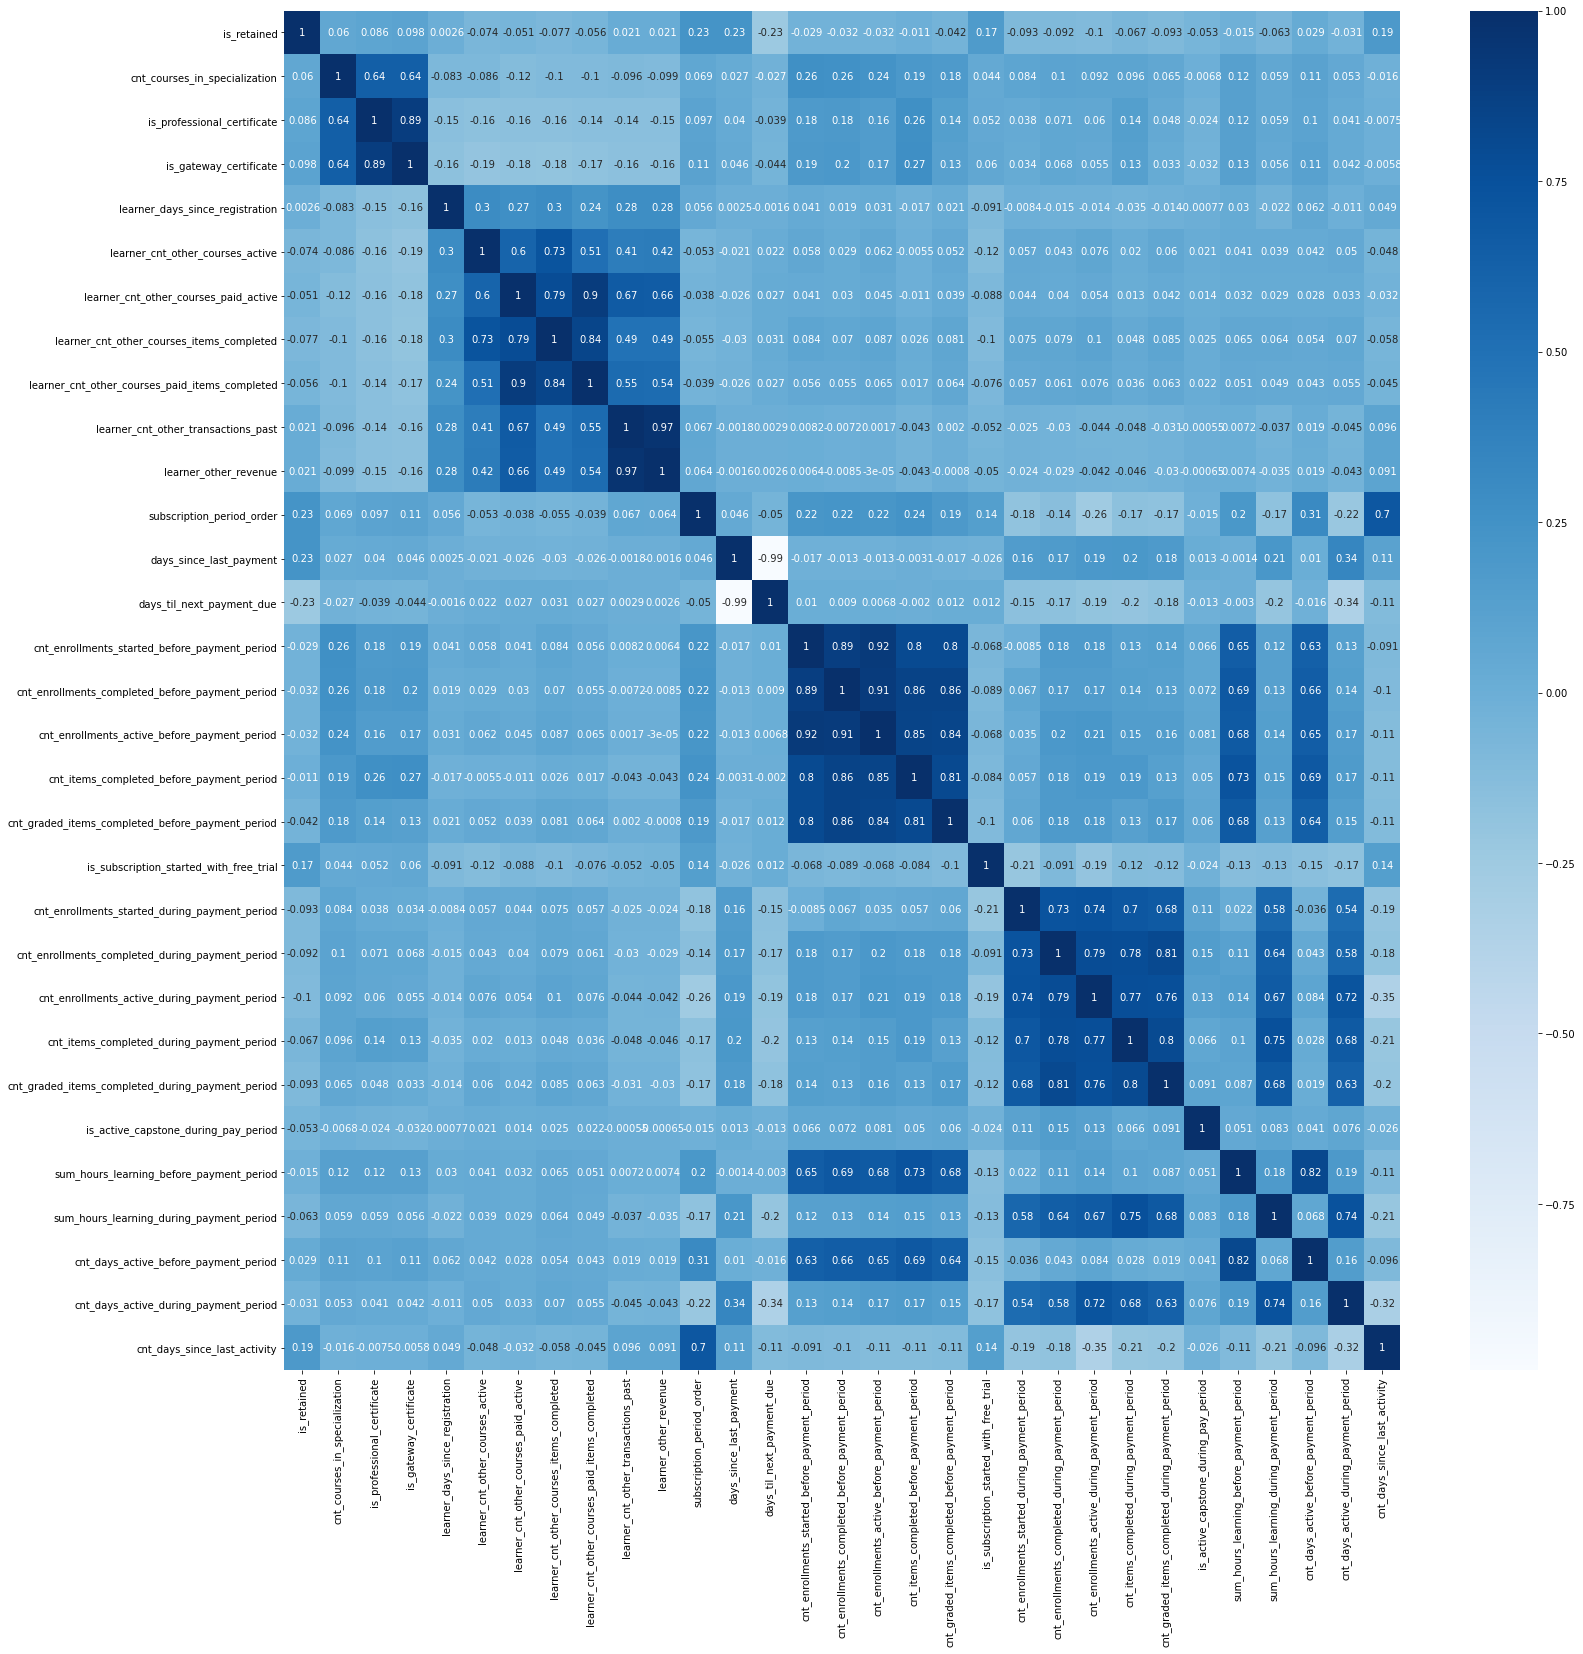

In [10]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(train_df.corr(), annot = True,cmap= 'Blues')

#### plot counter plot and decide to delete column is_active_capstone_during_pay_period as the most values is false

In [11]:
cols=[]
for i in train_df.select_dtypes(exclude='object').columns:
    if(len(train_df[i].unique()) <= 4):
        cols.append(i)
cols

['is_retained',
 'is_professional_certificate',
 'is_gateway_certificate',
 'is_subscription_started_with_free_trial',
 'is_active_capstone_during_pay_period']

is_retained
is_professional_certificate
is_gateway_certificate
is_subscription_started_with_free_trial
is_active_capstone_during_pay_period


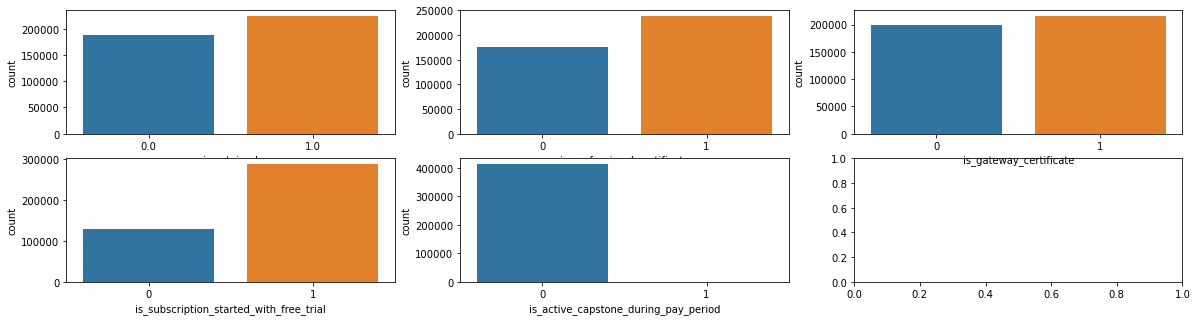

In [12]:
fig, ax = plt.subplots(2,3,figsize=(20,5))
z=1
for i in cols:
    plt.subplot(2,3,z)
    print(i)
    sns.countplot(train_df[i])
    z=z+1

In [13]:
train_df.drop(["is_active_capstone_during_pay_period"],axis=1,inplace=True)



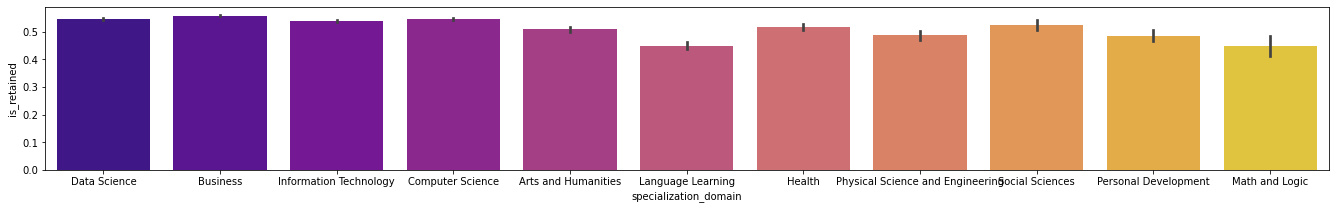

In [14]:
plt.subplots(figsize=(23,3))
G1=train_df[['specialization_domain','is_retained']].groupby(['specialization_domain'],as_index=False).sum()
sns.barplot(x ='specialization_domain', y ='is_retained', data = train_df,  
            palette ='plasma')

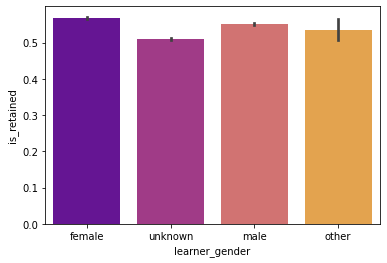

In [15]:
G1=train_df[['learner_gender','is_retained']].groupby(['learner_gender'],as_index=False).sum()
sns.barplot(x ='learner_gender', y ='is_retained', data = train_df,  
            palette ='plasma')

#### Remove some outliers from data at quantile less than 0.04 and more than 0.96

In [16]:
cols = train_df.select_dtypes(exclude=['object','datetime64[ns]']).columns # one or more



for i in cols:
    Q1 = train_df[i].quantile(0.04)
    Q3 = train_df[i].quantile(0.96)
    IQR = Q3 - Q1
    train_df = train_df[~((train_df[i] < (Q1 - 1.5 * IQR)) |(train_df[i] > (Q3 + 1.5 * IQR)))]

In [17]:
train_df

,observation_dt,is_retained,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,learner_gender,learner_cnt_other_courses_active,...,cnt_enrollments_started_during_payment_period,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,2022-05-04,1.0,8.0,Data Science,1,1,2321.0,Northern Europe,female,8.0,...,0.0,0.0,0.0,0.0,0.0,73.783333,0.000000,68.0,0.0,20.0
1,2021-11-30,0.0,6.0,Data Science,1,0,612.0,Northern Europe,female,52.0,...,0.0,0.0,0.0,0.0,0.0,0.850000,0.000000,7.0,2.0,0.0
2,2021-08-13,0.0,6.0,Business,1,1,27.0,Australia and New Zealand,unknown,5.0,...,0.0,0.0,1.0,12.0,2.0,1.833333,2.983333,2.0,1.0,18.0
3,2021-08-03,1.0,5.0,Information Technology,1,1,120.0,United States,male,0.0,...,1.0,0.0,2.0,83.0,9.0,18.450000,7.100000,18.0,4.0,3.0
4,2021-06-04,0.0,8.0,Data Science,1,1,1228.0,India,unknown,0.0,...,1.0,1.0,1.0,61.0,4.0,29.566667,15.250000,18.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413950,2021-06-05,1.0,5.0,Business,0,0,142.0,United States,female,0.0,...,0.0,0.0,0.0,0.0,0.0,4.783333,0.000000,11.0,2.0,19.0
413951,2021-01-27,0.0,4.0,Computer Science,0,0,2598.0,United States,unknown,21.0,...,1.0,0.0,2.0,5.0,3.0,10.216667,2.583333,8.0,2.0,23.0
413952,2022-07-06,1.0,4.0,Business,0,0,252.0,East Asia,female,0.0,...,0.0,0.0,0.0,0.0,0.0,2.716667,0.000000,4.0,0.0,219.0
413953,2022-05-04,0.0,8.0,Data Science,1,1,169.0,Southeast Asia,unknown,0.0,...,0.0,0.0,0.0,0.0,0.0,17.266667,0.000000,16.0,0.0,56.0


## Plot box plot(After remove some outliers) and Distribution of Data

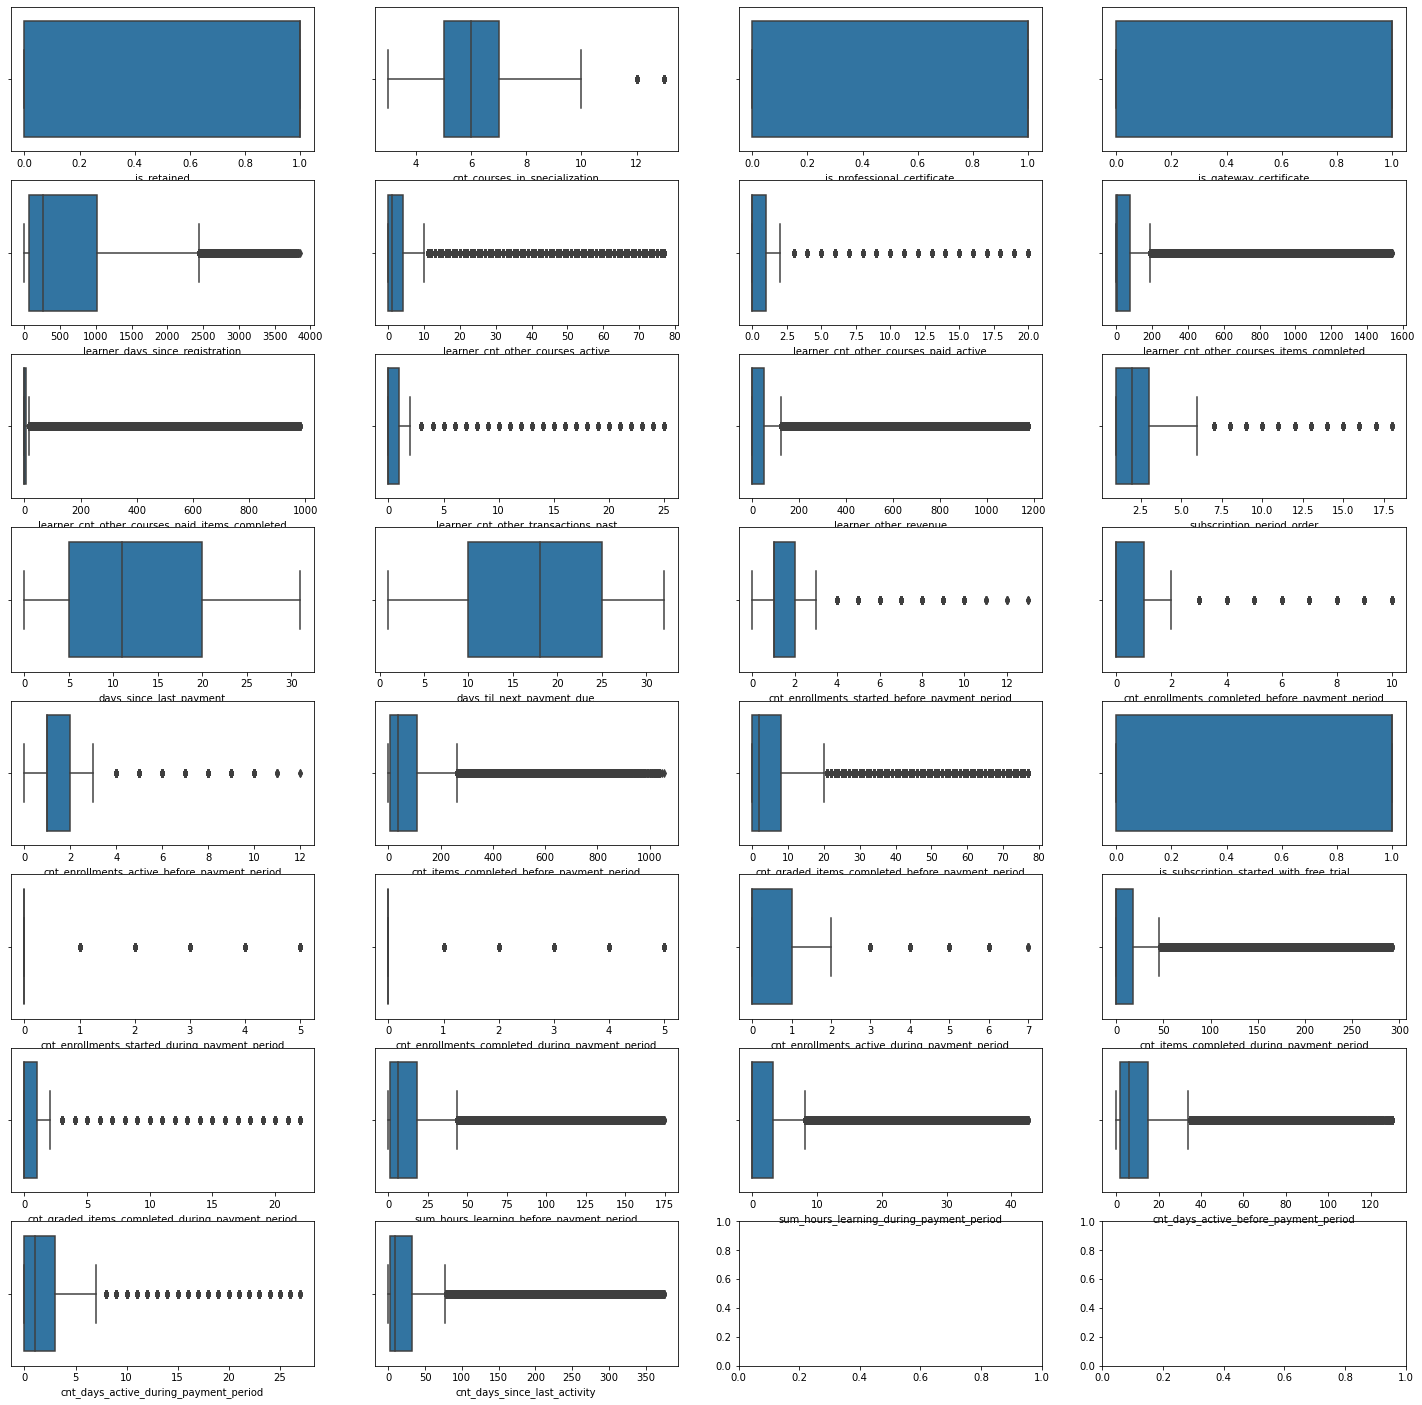

In [19]:

fig, ax = plt.subplots(8,4,figsize=(25,25))
z=1
for i in cols:
    plt.subplot(8,4,z)
    sns.boxplot(train_df[i])
    #train_df.boxplot([i])
    z=z+1



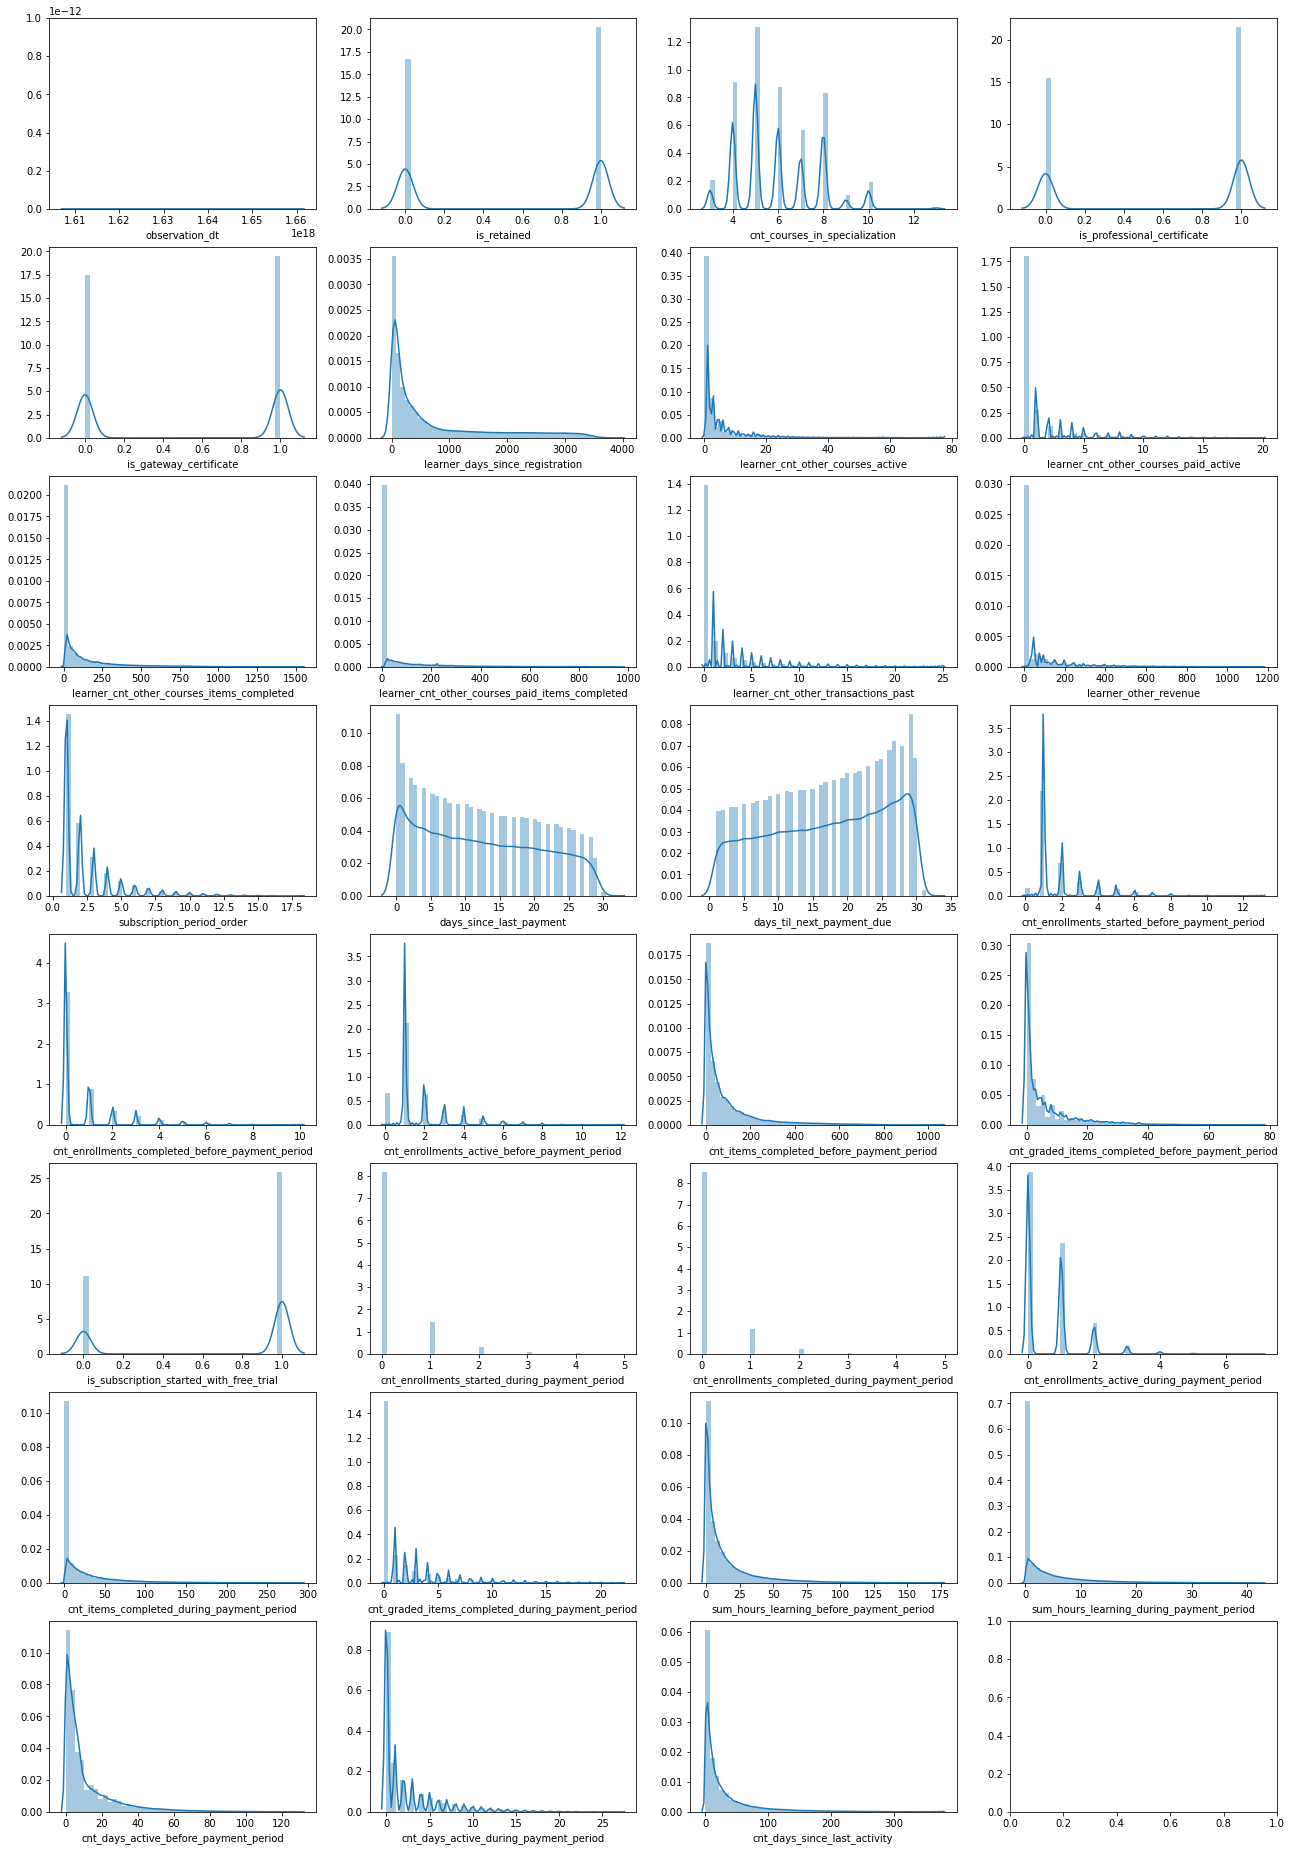

In [20]:
fig, ax = plt.subplots(8,4,figsize=(22,33))
z=1
for i in train_df.select_dtypes(exclude='object').columns:
    plt.subplot(8,4,z)
    sns.distplot(train_df[i]);
    z=z+1

### Show precentage of Null Values and Remove null rows

In [21]:
Nulls = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Nulls, percent], axis=1, keys=['Nulls', 'Percent'])
print(missing_data[:20])
train_df.dropna(axis=0,inplace=True)


                                                 Nulls   Percent
specialization_domain                                2  0.000005
cnt_days_since_last_activity                         1  0.000003
days_til_next_payment_due                            1  0.000003
is_retained                                          1  0.000003
cnt_courses_in_specialization                        1  0.000003
learner_days_since_registration                      1  0.000003
learner_country_group                                1  0.000003
learner_gender                                       1  0.000003
learner_cnt_other_courses_active                     1  0.000003
learner_cnt_other_courses_paid_active                1  0.000003
learner_cnt_other_courses_items_completed            1  0.000003
learner_cnt_other_courses_paid_items_completed       1  0.000003
learner_cnt_other_transactions_past                  1  0.000003
learner_other_revenue                                1  0.000003
subscription_period_order

### Convert Object columns, and Convert column observation_dt to year, month, Day columns, and remove it

In [22]:
train_df=pd.get_dummies(train_df)
train_df['Year'] = pd.DatetimeIndex(train_df['observation_dt']).year  
#train_df['Mon'] = pd.DatetimeIndex(train_df['observation_dt']).month
#train_df['Day'] = pd.DatetimeIndex(train_df['observation_dt']).day  
train_df.drop('observation_dt',axis=1,inplace=True)






In [23]:
train_df

,is_retained,cnt_courses_in_specialization,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,...,learner_country_group_Northern Europe,learner_country_group_Russia and neighbors,learner_country_group_Southeast Asia,learner_country_group_Southern Europe,learner_country_group_United States,learner_gender_female,learner_gender_male,learner_gender_other,learner_gender_unknown,Year
0,1.0,8.0,1,1,2321.0,8.0,0.0,88.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,2022
1,0.0,6.0,1,0,612.0,52.0,2.0,209.0,75.0,1.0,...,1,0,0,0,0,1,0,0,0,2021
2,0.0,6.0,1,1,27.0,5.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2021
3,1.0,5.0,1,1,120.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,2021
4,0.0,8.0,1,1,1228.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413949,0.0,5.0,0,0,23.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2021
413950,1.0,5.0,0,0,142.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,2021
413951,0.0,4.0,0,0,2598.0,21.0,16.0,827.0,719.0,12.0,...,0,0,0,0,1,0,0,0,1,2021
413952,1.0,4.0,0,0,252.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,2022


## Doing Standrad Scaler &  shuffle to our Data

In [24]:
Y=train_df['is_retained']
X=train_df.drop(['is_retained'],axis=1)
col=X.columns
sc_X = StandardScaler()
X = sc_X.fit_transform(X)




In [25]:
X, Y = shuffle(X, Y)
X=np.array(X)
Y=np.array(Y)

In [26]:
test_df['is_active_capstone_during_pay_period']=test_df['is_active_capstone_during_pay_period'].astype("bool")
test_df['is_gateway_certificate']=test_df['is_gateway_certificate'].astype("bool")
test_df['is_professional_certificate']=test_df['is_professional_certificate'].astype("bool")
test_df['is_active_capstone_during_pay_period']=test_df['is_active_capstone_during_pay_period'].astype("bool")
test_df['is_subscription_started_with_free_trial']=test_df['is_subscription_started_with_free_trial'].astype("bool")

test_df['is_active_capstone_during_pay_period']=test_df['is_active_capstone_during_pay_period'].astype("int64")
test_df['is_gateway_certificate']=test_df['is_gateway_certificate'].astype("int64")
test_df['is_professional_certificate']=test_df['is_professional_certificate'].astype("int64")
test_df['is_active_capstone_during_pay_period']=test_df['is_active_capstone_during_pay_period'].astype("int64")
test_df['is_subscription_started_with_free_trial']=test_df['is_subscription_started_with_free_trial'].astype("int64")

test_df.drop(["subscription_id","specialization_id","is_active_capstone_during_pay_period"],axis=1,inplace=True)
test_df['observation_dt']=pd.to_datetime(test_df['observation_dt'])


In [27]:
Nulls = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Nulls, percent], axis=1, keys=['Nulls', 'Percent'])
print(missing_data[:20])

                                                 Nulls  Percent
cnt_days_since_last_activity                         0      0.0
days_since_last_payment                              0      0.0
cnt_courses_in_specialization                        0      0.0
specialization_domain                                0      0.0
is_professional_certificate                          0      0.0
is_gateway_certificate                               0      0.0
learner_days_since_registration                      0      0.0
learner_country_group                                0      0.0
learner_gender                                       0      0.0
learner_cnt_other_courses_active                     0      0.0
learner_cnt_other_courses_paid_active                0      0.0
learner_cnt_other_courses_items_completed            0      0.0
learner_cnt_other_courses_paid_items_completed       0      0.0
learner_cnt_other_transactions_past                  0      0.0
learner_other_revenue                   

In [28]:

test_df=pd.get_dummies(test_df)
test_df['Year'] = pd.DatetimeIndex(test_df['observation_dt']).year  
#test_df['Mon'] = pd.DatetimeIndex(test_df['observation_dt']).month
#test_df['Day'] = pd.DatetimeIndex(test_df['observation_dt']).day  
test_df.drop('observation_dt',axis=1,inplace=True)

X_test = sc_X.fit_transform(test_df)



In [29]:
Nulls = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Nulls, percent], axis=1, keys=['Nulls', 'Percent'])
print(missing_data[:20])
X_test = np.array(X_test)

                                                  Nulls  Percent
Year                                                  0      0.0
learner_gender_unknown                                0      0.0
cnt_days_active_during_payment_period                 0      0.0
cnt_days_active_before_payment_period                 0      0.0
sum_hours_learning_during_payment_period              0      0.0
sum_hours_learning_before_payment_period              0      0.0
cnt_graded_items_completed_during_payment_period      0      0.0
cnt_items_completed_during_payment_period             0      0.0
cnt_enrollments_active_during_payment_period          0      0.0
cnt_enrollments_completed_during_payment_period       0      0.0
cnt_enrollments_started_during_payment_period         0      0.0
is_subscription_started_with_free_trial               0      0.0
cnt_graded_items_completed_before_payment_period      0      0.0
cnt_items_completed_before_payment_period             0      0.0
cnt_enrollments_active_be

# Modeling

In [30]:
X=np.array(X)
Y=np.array(Y)


classifier = Sequential([ 
# Adding the input layer and the first hidden layer
    
    
Dense(units = 256, activation = 'relu'),
    
# Adding the second hidden layer

Dense(units = 128, activation = 'relu'),
Dropout(0.1),
BatchNormalization(),
Dense(units = 64, activation = 'relu'),

# Adding the output layer
Dense(units = 1, activation = 'sigmoid')])

# Compiling the ANN | means applying SGD on the whole ANN

# Fitting the ANN to the Training set



In [31]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(lr=3,monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)
classifier.fit(X, Y, batch_size = 100, epochs = 70,callbacks=[learning_rate_reduction])



Train on 393414 samples
Epoch 1/70
393414/393414 [==============================] - 17s 42us/sample - loss: 0.6032 - accuracy: 0.6724
Epoch 2/70
393414/393414 [==============================] - 16s 41us/sample - loss: 0.5917 - accuracy: 0.6828
Epoch 3/70
393414/393414 [==============================] - 16s 41us/sample - loss: 0.5888 - accuracy: 0.6846
Epoch 4/70
393414/393414 [==============================] - 16s 40us/sample - loss: 0.5868 - accuracy: 0.6867
Epoch 5/70
393414/393414 [==============================] - 16s 40us/sample - loss: 0.5852 - accuracy: 0.6882
Epoch 6/70
393414/393414 [==============================] - 16s 41us/sample - loss: 0.5836 - accuracy: 0.6890
Epoch 7/70
393414/393414 [==============================] - 16s 41us/sample - loss: 0.5825 - accuracy: 0.6897
Epoch 8/70
393414/393414 [==============================] - 16s 41us/sample - loss: 0.5814 - accuracy: 0.6905
Epoch 9/70
393414/393414 [==============================] - 16s 41us/sample - loss: 0.5807 - acc

In [32]:
print('Best Score is :',roc_auc_score(Y, classifier.predict_proba(X)))


Best Score is : 0.8117901221733383


In [33]:
y_pr = classifier.predict_proba(X_test)

In [34]:
random_forest1 = RandomForestClassifier()
random_forest1.fit(X, Y)
print('Best Score is :',roc_auc_score(Y, random_forest1.predict(X)))

Y_pred6 = random_forest1.predict(X_test)

Best Score is : 0.9988358868619973


In [35]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=False)
decision_tree.fit(X, Y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=False, splitter='best')

In [36]:
print('Best Score is :',roc_auc_score(Y, decision_tree.predict(X)))

Y_pred1 = decision_tree.predict(X_test)

Best Score is : 0.9989052284864485


In [37]:
sgd = SGDClassifier()
sgd.fit(X, Y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
print('Best Score is :',roc_auc_score(Y, sgd.predict(X)))

Y_pred3 = sgd.predict(X_test)

Best Score is : 0.6573411586306908


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 217,921 entries plus a header row attempting to predict the likelihood of retention for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `subscription_id` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`subscription_id` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts retention using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
#dummy_clf = DummyClassifier(strategy="stratified")
#dummy_clf.fit(train_df.drop(['subscription_id', 'is_retained'], axis=1), train_df.is_retained)

In [39]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = Y_pred6# dummy_clf.predict_proba(test_df.drop(['subscription_id', 'observation_dt'], axis=1))[:, 1]

In [41]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS
test_df = pd.read_csv("test.csv")
test_df.shape
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'subscription_id': test_df[['subscription_id']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [42]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 217,921 rows and 2 columns 'subscription_id' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,1.0
1,-3jgpo3XEeuquA5bylYGqQ,1.0
2,-4iSgbBhEeutEwol7kuJnw,1.0
3,-D1ayv64Eeuw4w5IkZJKbw,0.0
4,-DJEc-L5Eeub2BLESLBCkw,1.0
5,-EbzSDdgEeyiog5l139adw,1.0
6,-GVVgmMxEeuQZgoplpe76w,1.0
7,-H4Bil5DEeyGdgqSaUkc7Q,0.0
8,-O-hHcevEeuPIA4yld1PaQ,0.0
9,-VFHd3C_EeuyDgqvLkrnfQ,1.0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for grading. Please run the tests below an ensure no assertion errors are thrown.

In [43]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [44]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [45]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [46]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.


## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!